In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os

In [2]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()


In [3]:
print(X_train.dtype)
print(X_test.dtype)
print(Y_train.dtype)
print(Y_test.dtype)

print(Y_train)

# 나는 이게 더 좋은 것 같다. -> (x_train/255.0).reshape(-1, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

print(Y_train)

uint8
uint8
uint8
uint8
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
# CNN 모델 설정
# Deepleaning에서는 kernel의 값은 인공지능이 결정한다. 사람은 사이즈만 정해주면 된다.
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.25))  # CNN은 왠만하면 Dropout을 사용하진 않는다. 이미지 정보가 날라가기 때문에...
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))    # 만일 CNN이 Dropout을 사용한다면 Flatten 이후에 사용하게 된다.
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}={val_loss:.4f}.hdf5"
checkpointer = keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [9]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])




Epoch 1: val_loss improved from inf to 0.05542, saving model to ./model/01=0.0554.hdf5

Epoch 2: val_loss improved from 0.05542 to 0.03851, saving model to ./model/02=0.0385.hdf5

Epoch 3: val_loss improved from 0.03851 to 0.03238, saving model to ./model/03=0.0324.hdf5

Epoch 4: val_loss improved from 0.03238 to 0.02742, saving model to ./model/04=0.0274.hdf5

Epoch 5: val_loss did not improve from 0.02742

Epoch 6: val_loss did not improve from 0.02742

Epoch 7: val_loss did not improve from 0.02742

Epoch 8: val_loss did not improve from 0.02742

Epoch 9: val_loss did not improve from 0.02742

Epoch 10: val_loss improved from 0.02742 to 0.02723, saving model to ./model/10=0.0272.hdf5

Epoch 11: val_loss improved from 0.02723 to 0.02451, saving model to ./model/11=0.0245.hdf5

Epoch 12: val_loss did not improve from 0.02451

Epoch 13: val_loss improved from 0.02451 to 0.02417, saving model to ./model/13=0.0242.hdf5

Epoch 14: val_loss did not improve from 0.02417

Epoch 15: val_loss

NameError: ignored

In [10]:
print(model.evaluate(X_test, Y_test)[1])

313/313 [==============================] - 8s 24ms/step - loss: 0.0292 - accuracy: 0.9931
0.9930999875068665


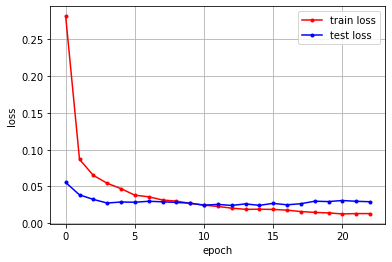

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], marker = '.', c = 'r', label="train loss")
plt.plot(history.history['val_loss'], marker = '.', c='b', label='test loss')
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()